# Installing Needed Tools

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Tools

In [2]:
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import matplotlib.pyplot as plt # for plotting
import cv2 # computer vision from extracting features from images
import seaborn as sns # enchancement of plotting library
sns.set_style("darkgrid")

## Dataset
Load the spreadsheet for feature extraction with computer vision.

In [3]:
spreadsheet_data = pd.read_csv("birds.csv") # load the dataset
spreadsheet_data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision & Features
The spreadsheet does not directly contains the features, rather the filepaths for the images. Before we can use Naive Bayes we need to use convert these images to usable data format in python.

In [4]:

# Get a reduced size image's array of the pixel data into a dataframe to easily relate it to it's 'label'
def load_resize_flatten_images(df, target_size=(28, 28)):    
    # convert data format to feature vectors
    images, labels = [],[]
    data = {'image':[],'label':[]}
    for index, row in df.iterrows():
        # extractp pixel data from the image at the file path
        image = cv2.imread(row['filepaths'])
        # gray scale to reduce data size while retaining most data as colors well be stored as intenisity
        grayscaledImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # resize image to smaller dimensions make data more managable
        resizedImage = cv2.resize(grayscaledImage,target_size)
        # flatten into a 1D array
        imageArray = resizedImage.flatten()
        data['image'].append(imageArray)
        # use the filepath as an identifer to label the image data
        data['label'].append(row['filepaths'])
    # encapsulate this data as a dataframe for easier handling
    return pd.DataFrame(data)
pixelData = load_resize_flatten_images(spreadsheet_data)
pixelData.head(10)


,image,label
0,"[50, 54, 58, 62, 65, 69, 70, 73, 74, 76, 81, 1...",train/ASIAN GREEN BEE EATER/162.jpg
1,"[119, 114, 107, 109, 114, 124, 137, 140, 151, ...",train/ASIAN GREEN BEE EATER/136.jpg
2,"[144, 144, 144, 143, 143, 143, 144, 146, 147, ...",train/ASIAN GREEN BEE EATER/153.jpg
3,"[157, 157, 157, 157, 157, 157, 157, 157, 157, ...",train/ASIAN GREEN BEE EATER/102.jpg
4,"[143, 142, 146, 153, 160, 164, 168, 172, 172, ...",train/ASIAN GREEN BEE EATER/145.jpg
5,"[88, 89, 87, 87, 89, 86, 90, 90, 93, 99, 98, 1...",train/ASIAN GREEN BEE EATER/101.jpg
6,"[71, 72, 91, 89, 80, 79, 83, 86, 86, 106, 124,...",train/ASIAN GREEN BEE EATER/105.jpg
7,"[120, 118, 118, 121, 118, 117, 111, 109, 108, ...",train/ASIAN GREEN BEE EATER/166.jpg
8,"[110, 91, 61, 75, 68, 240, 189, 41, 113, 103, ...",train/ASIAN GREEN BEE EATER/106.jpg
9,"[217, 220, 218, 215, 218, 212, 213, 216, 215, ...",train/ASIAN GREEN BEE EATER/103.jpg


## Basic Exploratory Data Analysis (EDA)
A given pixels value is logically independent of another. Since the heat map in the example exists to prove inpendence it has been forgone.

Text(0.5, 1.0, 'Grayscale Pixel Values')

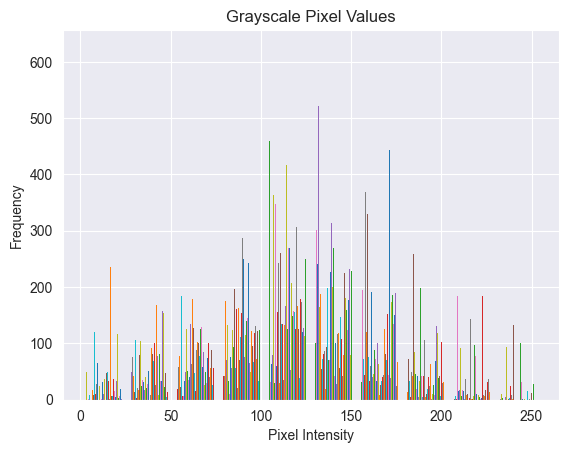

In [18]:
# Create a histogram with specified color
plt.hist(pixelData["image"], lw=0)

# Labeling x and y axes
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Title for the histogram
plt.title('Grayscale Pixel Values')

# EDA II, Data Distrubtion

In [19]:
def EDA2(pixelData):
    #todo show distributions for each label I guess.
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    sns.histplot(, ax=axes[0], x="mean_radius", kde=True, color='r')
    sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
    sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)


ValueError: Could not interpret value `Pixel Intensity` for `x`. An entry with this name does not appear in `data`.

## Calculate P(Y=y) for all possible y

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

## Test Gaussian model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

## Convert continuous features to Categorical features

In [ ]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 5, labels = [0,1,2,3,4])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

## Approach 2: Calculate P(X=x|Y=y) categorically

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]
    print(features)
    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

## Test Categorical model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)


X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))